In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

C:\Users\vinic\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importing dataset

In [2]:
df=pd.read_excel('stats-draft.xlsx')
df.head()

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,orb,drb,rpg,apg,spg,bpg,tov,pf,draft_pos,drafted
0,Kee-Kee Clark,Fr,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,...,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9,NaN,NaN
1,Darshan Luckey,Fr,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,...,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3,NaN,NaN
2,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4,NaN,NaN
3,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9,NaN,NaN
4,Jamar Wilson,Fr,2003,27,37.2,18.9,6.8,13.9,0.488,1.2,...,1.5,2.3,3.8,3.3,0.8,0.1,3.6,3.0,NaN,NaN


Filling null values in drafted column as undrafted

In [3]:
df['drafted'].isnull().value_counts()

True     15470
False      477
Name: drafted, dtype: int64

In [4]:
df['drafted'].fillna('undrafted',inplace=True)

In [5]:
df['drafted'].isnull().value_counts()

False    15947
Name: drafted, dtype: int64

In [6]:
df.head()

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,orb,drb,rpg,apg,spg,bpg,tov,pf,draft_pos,drafted
0,Kee-Kee Clark,Fr,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,...,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9,NaN,undrafted
1,Darshan Luckey,Fr,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,...,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3,NaN,undrafted
2,Craig Smith,Fr,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,...,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4,NaN,undrafted
3,Ike Diogu,Fr,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,...,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9,NaN,undrafted
4,Jamar Wilson,Fr,2003,27,37.2,18.9,6.8,13.9,0.488,1.2,...,1.5,2.3,3.8,3.3,0.8,0.1,3.6,3.0,NaN,undrafted


In [7]:
df.drop(['year','draft_pos'],axis='columns',inplace=True)
df

,player,cls,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,ft%,orb,drb,rpg,apg,spg,bpg,tov,pf,drafted
0,Kee-Kee Clark,Fr,29,38.2,24.9,8.0,20.1,0.396,3.8,9.6,...,0.853,0.8,2.4,3.3,4.2,1.4,0.2,4.0,1.9,undrafted
1,Darshan Luckey,Fr,28,37.5,21.6,7.2,18.8,0.383,1.6,5.9,...,0.777,0.8,4.4,5.1,1.6,1.7,0.3,4.1,2.3,undrafted
2,Craig Smith,Fr,31,31.9,19.9,7.8,12.9,0.603,0.1,0.5,...,0.677,3.2,4.7,7.9,1.3,0.9,0.9,2.4,3.4,undrafted
3,Ike Diogu,Fr,32,32.2,19.0,6.6,10.8,0.609,0.3,0.8,...,0.735,3.1,4.8,7.8,0.8,0.3,1.0,2.8,2.9,undrafted
4,Jamar Wilson,Fr,27,37.2,18.9,6.8,13.9,0.488,1.2,3.4,...,0.815,1.5,2.3,3.8,3.3,0.8,0.1,3.6,3.0,undrafted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,Jett Howard,Fr,29,31.7,14.2,4.7,11.4,0.414,2.7,7.3,...,0.800,0.3,2.6,2.8,2.0,0.4,0.7,1.3,2.2,first round
15943,Jalen Hood-Schifino,Fr,32,33.1,13.5,5.3,12.6,0.417,1.2,3.5,...,0.776,0.4,3.7,4.1,3.7,0.8,0.3,2.8,2.4,first round
15944,Anthony Black,Fr,36,34.3,12.8,4.1,9.1,0.453,0.8,2.6,...,0.705,1.3,3.8,5.1,3.9,2.1,0.6,3.0,2.6,first round
15945,Jalen Wilson,Jr,36,35.4,20.1,6.9,16.0,0.430,1.9,5.8,...,0.799,1.6,6.7,8.3,2.2,0.9,0.5,2.3,2.1,second round


<AxesSubplot:xlabel='drafted', ylabel='ppg'>

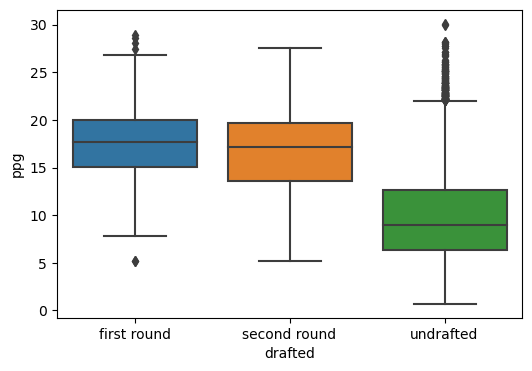

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='ppg',order=['first round','second round','undrafted'])

In [9]:
df[['drafted','ppg']].groupby('drafted')['ppg'].mean()

drafted
first round     17.638947
second round    16.581250
undrafted        9.876412
Name: ppg, dtype: float64

<AxesSubplot:xlabel='drafted', ylabel='fg%'>

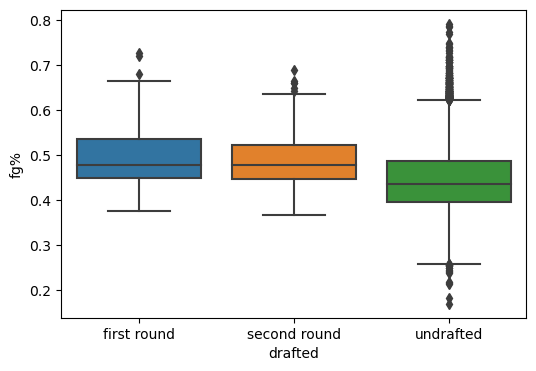

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='fg%',order=['first round','second round','undrafted'])

In [11]:
df[['drafted','fg%']].groupby('drafted')['fg%'].mean()

drafted
first round     0.497537
second round    0.487755
undrafted       0.444105
Name: fg%, dtype: float64

<AxesSubplot:xlabel='cls'>

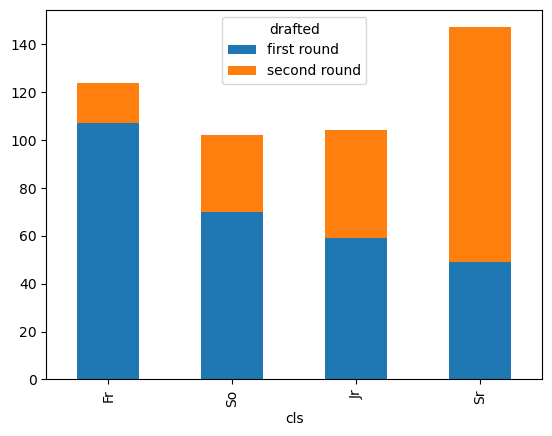

In [12]:
a=(df[['cls','drafted']].loc[df['drafted']!='undrafted']).groupby(by=['cls','drafted'])['cls'].count()
a.unstack().reindex(['Fr','So','Jr','Sr']).plot(kind='bar',stacked=True)

In [13]:
df.columns

Index(['player', 'cls', 'gp', 'mpg', 'ppg', 'fgm', 'fga', 'fg%', '3pm', '3pa',
       '3p%', 'ftm', 'fta', 'ft%', 'orb', 'drb', 'rpg', 'apg', 'spg', 'bpg',
       'tov', 'pf', 'drafted'],
      dtype='object')

In [14]:
#plt.figure(figsize=(6,4))
#sns.boxplot(data=df,x='drafted',y='PER',order=['first round','second round','undrafted'])

In [15]:
#df[['drafted','PER']].groupby('drafted')['PER'].mean()

In [16]:
#plt.figure(figsize=(6,4))
#sns.boxplot(data=df,x='drafted',y='FIC',order=['first round','second round','undrafted'])

In [17]:
#df[['drafted','FIC']].groupby('drafted')['FIC'].mean()

### Model

In [18]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

making class a dummy variable

In [19]:
df=pd.get_dummies(df,columns=['cls'])
df

,player,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,3p%,...,apg,spg,bpg,tov,pf,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
0,Kee-Kee Clark,29,38.2,24.9,8.0,20.1,0.396,3.8,9.6,0.392,...,4.2,1.4,0.2,4.0,1.9,undrafted,1,0,0,0
1,Darshan Luckey,28,37.5,21.6,7.2,18.8,0.383,1.6,5.9,0.280,...,1.6,1.7,0.3,4.1,2.3,undrafted,1,0,0,0
2,Craig Smith,31,31.9,19.9,7.8,12.9,0.603,0.1,0.5,0.200,...,1.3,0.9,0.9,2.4,3.4,undrafted,1,0,0,0
3,Ike Diogu,32,32.2,19.0,6.6,10.8,0.609,0.3,0.8,0.375,...,0.8,0.3,1.0,2.8,2.9,undrafted,1,0,0,0
4,Jamar Wilson,27,37.2,18.9,6.8,13.9,0.488,1.2,3.4,0.359,...,3.3,0.8,0.1,3.6,3.0,undrafted,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,Jett Howard,29,31.7,14.2,4.7,11.4,0.414,2.7,7.3,0.368,...,2.0,0.4,0.7,1.3,2.2,first round,1,0,0,0
15943,Jalen Hood-Schifino,32,33.1,13.5,5.3,12.6,0.417,1.2,3.5,0.333,...,3.7,0.8,0.3,2.8,2.4,first round,1,0,0,0
15944,Anthony Black,36,34.3,12.8,4.1,9.1,0.453,0.8,2.6,0.301,...,3.9,2.1,0.6,3.0,2.6,first round,1,0,0,0
15945,Jalen Wilson,36,35.4,20.1,6.9,16.0,0.430,1.9,5.8,0.337,...,2.2,0.9,0.5,2.3,2.1,second round,0,1,0,0


In [20]:
def f(x):
    if x=='undrafted':
        return 0
    else:  return 1

df['drafted']=df['drafted'].apply(lambda x: f(x))

dropping player names

In [21]:
df.drop('player',axis='columns',inplace=True)

defining x and y matrices

In [22]:
X=df.drop('drafted',axis='columns')
y=df['drafted']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [25]:
y_encoded

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
pd.DataFrame(y_encoded).value_counts()

0    15470
1      477
dtype: int64

In [27]:
x_tr,x_tt,y_tr,y_tt=train_test_split(X,y,test_size=0.2,stratify=y)

In [28]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_tr.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

C:\Users\vinic\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,426 (732.13 KB)

 Trainable params: 187,426 (732.13 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(x_tr,y_tr,epochs=30,validation_split=0.3)

Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9516 - loss: 0.1829 - val_accuracy: 0.9694 - val_loss: 0.1171
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9694 - loss: 0.1107 - val_accuracy: 0.9694 - val_loss: 0.1099
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9699 - loss: 0.0976 - val_accuracy: 0.9694 - val_loss: 0.1141
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9730 - loss: 0.0881 - val_accuracy: 0.9694 - val_loss: 0.1017
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9702 - loss: 0.1008 - val_accuracy: 0.9694 - val_loss: 0.1043
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9709 - loss: 0.0903 - val_accuracy: 0.9694 - val_loss: 0.1021
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9721 - loss: 0.0860 - val_accuracy: 0.9694 - val_loss: 0.1044
Epoch 8/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9713 - loss: 0.0882 - val_accuracy: 0.

In [32]:
loss, accuracy = model.evaluate(x_tt,y_tt)
print(f'Acurácia do modelo: {accuracy}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.0936
Acurácia do modelo: 0.9714733362197876


In [33]:
y_pred=model.predict(x_tt)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
x_tt['drafted']=y_tt

In [35]:
x_tt['drafted'].value_counts()

0    3095
1      95
Name: drafted, dtype: int64

In [36]:
def binarize(y,thresh):
    yhat=[]
    for pred in y:
        if pred[1]>=thresh:
            yhat.append(1)
        else:
            yhat.append(0)
    return yhat

In [37]:
prediction=binarize(y_pred,0.25)

In [38]:
pd.DataFrame(prediction).value_counts()

0    2954
1     236
dtype: int64

In [39]:
y_pred[:,1].mean()

0.058976885

In [40]:
f1_score(prediction,y_tt)

0.3867069486404834

In [41]:
df=pd.read_excel('stats-draft.xlsx')
df=pd.get_dummies(df,columns=['cls'])
df.head()

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,spg,bpg,tov,pf,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
0,Kee-Kee Clark,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,9.6,...,1.4,0.2,4.0,1.9,NaN,NaN,1,0,0,0
1,Darshan Luckey,2003,28,37.5,21.6,7.2,18.8,0.383,1.6,5.9,...,1.7,0.3,4.1,2.3,NaN,NaN,1,0,0,0
2,Craig Smith,2003,31,31.9,19.9,7.8,12.9,0.603,0.1,0.5,...,0.9,0.9,2.4,3.4,NaN,NaN,1,0,0,0
3,Ike Diogu,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,0.8,...,0.3,1.0,2.8,2.9,NaN,NaN,1,0,0,0
4,Jamar Wilson,2003,27,37.2,18.9,6.8,13.9,0.488,1.2,3.4,...,0.8,0.1,3.6,3.0,NaN,NaN,1,0,0,0


In [42]:
def predict_class(year):
    predictions=[]
    draft_class=df.loc[df['year']==year]
    for i in tqdm(range(len(draft_class))):
        player=draft_class['player'].iloc[i]
        player_stats=draft_class.loc[draft_class['player']==player].drop(columns=['player','year','draft_pos','drafted']).iloc[0]
        predictions.append([player,model.predict(np.array([list(player_stats)]))[0][1]])
        
    return predictions

In [43]:
class_prediction=predict_class(2020)

  0%|                                                                                          | 0/774 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|▏                                                                                 | 2/774 [00:00<00:55, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  1%|▍                                                                                 | 4/774 [00:00<01:07, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


  1%|▋                                                                                 | 6/774 [00:00<01:05, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|▊                                                                                 | 8/774 [00:00<01:01, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|█                                                                                | 10/774 [00:00<00:58, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  2%|█▎                                                                               | 12/774 [00:00<01:02, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  2%|█▍                                                                               | 14/774 [00:01<01:06, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  2%|█▋                                                                               | 16/774 [00:01<01:04, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


  2%|█▉                                                                               | 18/774 [00:01<01:07, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  3%|██                                                                               | 20/774 [00:01<01:03, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  3%|██▎                                                                              | 22/774 [00:01<01:03, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▌                                                                              | 24/774 [00:02<01:02, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  3%|██▋                                                                              | 26/774 [00:02<00:57, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  4%|██▉                                                                              | 28/774 [00:02<00:55, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  4%|███▏                                                                             | 30/774 [00:02<00:53, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  4%|███▎                                                                             | 32/774 [00:02<00:55, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  4%|███▌                                                                             | 34/774 [00:02<00:54, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  5%|███▊                                                                             | 36/774 [00:02<00:57, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  5%|███▉                                                                             | 38/774 [00:03<00:55, 13.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  5%|████▏                                                                            | 40/774 [00:03<00:53, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  5%|████▍                                                                            | 42/774 [00:03<00:55, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  6%|████▌                                                                            | 44/774 [00:03<00:54, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  6%|████▊                                                                            | 46/774 [00:03<00:53, 13.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  6%|█████                                                                            | 48/774 [00:03<00:53, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  6%|█████▏                                                                           | 50/774 [00:03<00:54, 13.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  7%|█████▍                                                                           | 52/774 [00:04<00:53, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  7%|█████▋                                                                           | 54/774 [00:04<00:56, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  7%|█████▊                                                                           | 56/774 [00:04<00:56, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  7%|██████                                                                           | 58/774 [00:04<01:01, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  8%|██████▎                                                                          | 60/774 [00:04<01:01, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


  8%|██████▍                                                                          | 62/774 [00:04<00:57, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  8%|██████▋                                                                          | 64/774 [00:05<00:55, 12.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


  9%|██████▉                                                                          | 66/774 [00:05<00:56, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  9%|███████                                                                          | 68/774 [00:05<00:57, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  9%|███████▎                                                                         | 70/774 [00:05<00:58, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  9%|███████▌                                                                         | 72/774 [00:05<00:56, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 10%|███████▋                                                                         | 74/774 [00:05<00:54, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|███████▉                                                                         | 76/774 [00:06<00:59, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 10%|████████▏                                                                        | 78/774 [00:06<00:57, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 10%|████████▎                                                                        | 80/774 [00:06<00:58, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 11%|████████▌                                                                        | 82/774 [00:06<00:55, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▊                                                                        | 84/774 [00:06<00:56, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|█████████                                                                        | 86/774 [00:06<00:58, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 11%|█████████▏                                                                       | 88/774 [00:07<00:58, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 12%|█████████▍                                                                       | 90/774 [00:07<00:57, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 12%|█████████▋                                                                       | 92/774 [00:07<00:53, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 12%|█████████▊                                                                       | 94/774 [00:07<00:56, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 12%|██████████                                                                       | 96/774 [00:07<00:59, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 13%|██████████▎                                                                      | 98/774 [00:07<01:01, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|██████████▎                                                                     | 100/774 [00:08<01:02, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 13%|██████████▌                                                                     | 102/774 [00:08<01:01, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 13%|██████████▋                                                                     | 104/774 [00:08<00:58, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|██████████▉                                                                     | 106/774 [00:08<01:03, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 14%|███████████▏                                                                    | 108/774 [00:08<00:58, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|███████████▎                                                                    | 110/774 [00:09<00:59, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 14%|███████████▌                                                                    | 112/774 [00:09<00:53, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 15%|███████████▊                                                                    | 114/774 [00:09<00:53, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 15%|███████████▉                                                                    | 116/774 [00:09<00:53, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 15%|████████████▏                                                                   | 118/774 [00:09<00:50, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 16%|████████████▍                                                                   | 120/774 [00:09<00:50, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 16%|████████████▌                                                                   | 122/774 [00:09<00:49, 13.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▊                                                                   | 124/774 [00:10<00:53, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 16%|█████████████                                                                   | 126/774 [00:10<00:52, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 17%|█████████████▏                                                                  | 128/774 [00:10<00:53, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 17%|█████████████▍                                                                  | 130/774 [00:10<00:54, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 17%|█████████████▋                                                                  | 132/774 [00:10<00:54, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 17%|█████████████▊                                                                  | 134/774 [00:10<00:51, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 18%|██████████████                                                                  | 136/774 [00:11<00:51, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 18%|██████████████▎                                                                 | 138/774 [00:11<00:49, 12.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 18%|██████████████▍                                                                 | 140/774 [00:11<00:47, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 18%|██████████████▋                                                                 | 142/774 [00:11<00:48, 12.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 19%|██████████████▉                                                                 | 144/774 [00:11<00:47, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|███████████████                                                                 | 146/774 [00:11<00:48, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 19%|███████████████▎                                                                | 148/774 [00:11<00:46, 13.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


 19%|███████████████▌                                                                | 150/774 [00:12<00:46, 13.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 20%|███████████████▋                                                                | 152/774 [00:12<00:45, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 20%|███████████████▉                                                                | 154/774 [00:12<00:45, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 20%|████████████████                                                                | 156/774 [00:12<00:45, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 20%|████████████████▎                                                               | 158/774 [00:12<00:44, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 21%|████████████████▌                                                               | 160/774 [00:12<00:44, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 21%|████████████████▋                                                               | 162/774 [00:12<00:43, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 21%|████████████████▉                                                               | 164/774 [00:13<00:43, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 21%|█████████████████▏                                                              | 166/774 [00:13<00:43, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 22%|█████████████████▎                                                              | 168/774 [00:13<00:45, 13.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 22%|█████████████████▌                                                              | 170/774 [00:13<00:49, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 22%|█████████████████▊                                                              | 172/774 [00:13<00:46, 13.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 22%|█████████████████▉                                                              | 174/774 [00:13<00:44, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▏                                                             | 176/774 [00:14<00:47, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▍                                                             | 178/774 [00:14<00:48, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 23%|██████████████████▌                                                             | 180/774 [00:14<00:46, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 24%|██████████████████▊                                                             | 182/774 [00:14<00:44, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 24%|███████████████████                                                             | 184/774 [00:14<00:43, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▏                                                            | 186/774 [00:14<00:47, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 24%|███████████████████▍                                                            | 188/774 [00:14<00:43, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 25%|███████████████████▋                                                            | 190/774 [00:15<00:40, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 25%|███████████████████▊                                                            | 192/774 [00:15<00:40, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 25%|████████████████████                                                            | 194/774 [00:15<00:41, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


 25%|████████████████████▎                                                           | 196/774 [00:15<00:41, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 26%|████████████████████▍                                                           | 198/774 [00:15<00:41, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


 26%|████████████████████▋                                                           | 200/774 [00:15<00:42, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


 26%|████████████████████▉                                                           | 202/774 [00:15<00:44, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|█████████████████████                                                           | 204/774 [00:16<00:43, 13.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 27%|█████████████████████▎                                                          | 206/774 [00:16<00:43, 13.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 27%|█████████████████████▍                                                          | 208/774 [00:16<00:44, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████▋                                                          | 210/774 [00:16<00:46, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 27%|█████████████████████▉                                                          | 212/774 [00:16<00:46, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 28%|██████████████████████                                                          | 214/774 [00:16<00:44, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 28%|██████████████████████▎                                                         | 216/774 [00:17<00:43, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 28%|██████████████████████▌                                                         | 218/774 [00:17<00:43, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 28%|██████████████████████▋                                                         | 220/774 [00:17<00:46, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 29%|██████████████████████▉                                                         | 222/774 [00:17<00:47, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 29%|███████████████████████▏                                                        | 224/774 [00:17<00:44, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 29%|███████████████████████▎                                                        | 226/774 [00:17<00:44, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 29%|███████████████████████▌                                                        | 228/774 [00:18<00:43, 12.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|███████████████████████▊                                                        | 230/774 [00:18<00:46, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 30%|███████████████████████▉                                                        | 232/774 [00:18<00:46, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 30%|████████████████████████▏                                                       | 234/774 [00:18<00:46, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 30%|████████████████████████▍                                                       | 236/774 [00:18<00:45, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 31%|████████████████████████▌                                                       | 238/774 [00:18<00:45, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|████████████████████████▊                                                       | 240/774 [00:19<00:43, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 31%|█████████████████████████                                                       | 242/774 [00:19<00:45, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 32%|█████████████████████████▏                                                      | 244/774 [00:19<00:44, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


 32%|█████████████████████████▍                                                      | 246/774 [00:19<00:42, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 32%|█████████████████████████▋                                                      | 248/774 [00:19<00:43, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 32%|█████████████████████████▊                                                      | 250/774 [00:19<00:41, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 33%|██████████████████████████                                                      | 252/774 [00:20<00:39, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|██████████████████████████▎                                                     | 254/774 [00:20<00:38, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 33%|██████████████████████████▍                                                     | 256/774 [00:20<00:37, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 33%|██████████████████████████▋                                                     | 258/774 [00:20<00:35, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 34%|██████████████████████████▊                                                     | 260/774 [00:20<00:35, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 34%|███████████████████████████                                                     | 262/774 [00:20<00:38, 13.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 34%|███████████████████████████▎                                                    | 264/774 [00:20<00:40, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 34%|███████████████████████████▍                                                    | 266/774 [00:21<00:37, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 35%|███████████████████████████▋                                                    | 268/774 [00:21<00:38, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 35%|███████████████████████████▉                                                    | 270/774 [00:21<00:39, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 35%|████████████████████████████                                                    | 272/774 [00:21<00:39, 12.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 35%|████████████████████████████▎                                                   | 274/774 [00:21<00:40, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 36%|████████████████████████████▌                                                   | 276/774 [00:21<00:41, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 36%|████████████████████████████▋                                                   | 278/774 [00:22<00:41, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 36%|████████████████████████████▉                                                   | 280/774 [00:22<00:41, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 36%|█████████████████████████████▏                                                  | 282/774 [00:22<00:38, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 37%|█████████████████████████████▎                                                  | 284/774 [00:22<00:39, 12.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 37%|█████████████████████████████▌                                                  | 286/774 [00:22<00:38, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 37%|█████████████████████████████▊                                                  | 288/774 [00:22<00:36, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 37%|█████████████████████████████▉                                                  | 290/774 [00:22<00:34, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|██████████████████████████████▏                                                 | 292/774 [00:23<00:33, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 38%|██████████████████████████████▍                                                 | 294/774 [00:23<00:34, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|██████████████████████████████▌                                                 | 296/774 [00:23<00:35, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|██████████████████████████████▊                                                 | 298/774 [00:23<00:36, 12.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 39%|███████████████████████████████                                                 | 300/774 [00:23<00:35, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 39%|███████████████████████████████▏                                                | 302/774 [00:23<00:36, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 39%|███████████████████████████████▍                                                | 304/774 [00:24<00:33, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 40%|███████████████████████████████▋                                                | 306/774 [00:24<00:32, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 40%|███████████████████████████████▊                                                | 308/774 [00:24<00:33, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 40%|████████████████████████████████                                                | 310/774 [00:24<00:33, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 40%|████████████████████████████████▏                                               | 312/774 [00:24<00:33, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 41%|████████████████████████████████▍                                               | 314/774 [00:24<00:35, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 41%|████████████████████████████████▋                                               | 316/774 [00:24<00:36, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 41%|████████████████████████████████▊                                               | 318/774 [00:25<00:36, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 41%|█████████████████████████████████                                               | 320/774 [00:25<00:35, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|█████████████████████████████████▎                                              | 322/774 [00:25<00:34, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 42%|█████████████████████████████████▍                                              | 324/774 [00:25<00:34, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 42%|█████████████████████████████████▋                                              | 326/774 [00:25<00:33, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


 42%|█████████████████████████████████▉                                              | 328/774 [00:25<00:32, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 43%|██████████████████████████████████                                              | 330/774 [00:25<00:32, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 43%|██████████████████████████████████▎                                             | 332/774 [00:26<00:32, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|██████████████████████████████████▌                                             | 334/774 [00:26<00:34, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 43%|██████████████████████████████████▋                                             | 336/774 [00:26<00:35, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


 44%|██████████████████████████████████▉                                             | 338/774 [00:26<00:34, 12.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 44%|███████████████████████████████████▏                                            | 340/774 [00:26<00:36, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 44%|███████████████████████████████████▎                                            | 342/774 [00:26<00:33, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|███████████████████████████████████▌                                            | 344/774 [00:27<00:34, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 45%|███████████████████████████████████▊                                            | 346/774 [00:27<00:36, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 45%|███████████████████████████████████▉                                            | 348/774 [00:27<00:33, 12.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 45%|████████████████████████████████████▏                                           | 350/774 [00:27<00:34, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 45%|████████████████████████████████████▍                                           | 352/774 [00:27<00:34, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████████████████████████████████████▌                                           | 354/774 [00:27<00:33, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 46%|████████████████████████████████████▊                                           | 356/774 [00:28<00:33, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 46%|█████████████████████████████████████                                           | 358/774 [00:28<00:34, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 47%|█████████████████████████████████████▏                                          | 360/774 [00:28<00:32, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 47%|█████████████████████████████████████▍                                          | 362/774 [00:28<00:32, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 47%|█████████████████████████████████████▌                                          | 364/774 [00:28<00:34, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████▊                                          | 366/774 [00:28<00:34, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 48%|██████████████████████████████████████                                          | 368/774 [00:29<00:34, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 48%|██████████████████████████████████████▏                                         | 370/774 [00:29<00:34, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 48%|██████████████████████████████████████▍                                         | 372/774 [00:29<00:30, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 48%|██████████████████████████████████████▋                                         | 374/774 [00:29<00:29, 13.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|██████████████████████████████████████▊                                         | 376/774 [00:29<00:34, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|███████████████████████████████████████                                         | 378/774 [00:29<00:35, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 49%|███████████████████████████████████████▎                                        | 380/774 [00:30<00:33, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|███████████████████████████████████████▍                                        | 382/774 [00:30<00:31, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 50%|███████████████████████████████████████▋                                        | 384/774 [00:30<00:34, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 50%|███████████████████████████████████████▉                                        | 386/774 [00:30<00:32, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 50%|████████████████████████████████████████                                        | 388/774 [00:30<00:32, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 50%|████████████████████████████████████████▎                                       | 390/774 [00:30<00:29, 12.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 51%|████████████████████████████████████████▌                                       | 392/774 [00:31<00:30, 12.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 51%|████████████████████████████████████████▋                                       | 394/774 [00:31<00:30, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 51%|████████████████████████████████████████▉                                       | 396/774 [00:31<00:31, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 51%|█████████████████████████████████████████▏                                      | 398/774 [00:31<00:29, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 52%|█████████████████████████████████████████▎                                      | 400/774 [00:31<00:29, 12.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████████████████████████████████████████▌                                      | 402/774 [00:31<00:31, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


 52%|█████████████████████████████████████████▊                                      | 404/774 [00:32<00:30, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 52%|█████████████████████████████████████████▉                                      | 406/774 [00:32<00:30, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 53%|██████████████████████████████████████████▏                                     | 408/774 [00:32<00:29, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 53%|██████████████████████████████████████████▍                                     | 410/774 [00:32<00:30, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 53%|██████████████████████████████████████████▌                                     | 412/774 [00:32<00:29, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 53%|██████████████████████████████████████████▊                                     | 414/774 [00:32<00:28, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▉                                     | 416/774 [00:33<00:30, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 54%|███████████████████████████████████████████▏                                    | 418/774 [00:33<00:29, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 54%|███████████████████████████████████████████▍                                    | 420/774 [00:33<00:28, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 55%|███████████████████████████████████████████▌                                    | 422/774 [00:33<00:27, 12.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▊                                    | 424/774 [00:33<00:28, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 55%|████████████████████████████████████████████                                    | 426/774 [00:33<00:27, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 55%|████████████████████████████████████████████▏                                   | 428/774 [00:33<00:27, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████▍                                   | 430/774 [00:34<00:26, 13.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|████████████████████████████████████████████▋                                   | 432/774 [00:34<00:25, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 56%|████████████████████████████████████████████▊                                   | 434/774 [00:34<00:27, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 56%|█████████████████████████████████████████████                                   | 436/774 [00:34<00:26, 12.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 57%|█████████████████████████████████████████████▎                                  | 438/774 [00:34<00:25, 13.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 57%|█████████████████████████████████████████████▍                                  | 440/774 [00:34<00:27, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 57%|█████████████████████████████████████████████▋                                  | 442/774 [00:35<00:27, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████████████████████████████████████████████▉                                  | 444/774 [00:35<00:28, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 58%|██████████████████████████████████████████████                                  | 446/774 [00:35<00:30, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 58%|██████████████████████████████████████████████▎                                 | 448/774 [00:35<00:31, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 58%|██████████████████████████████████████████████▌                                 | 450/774 [00:35<00:28, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 58%|██████████████████████████████████████████████▋                                 | 452/774 [00:35<00:26, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 59%|██████████████████████████████████████████████▉                                 | 454/774 [00:36<00:25, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 59%|███████████████████████████████████████████████▏                                | 456/774 [00:36<00:26, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|███████████████████████████████████████████████▎                                | 458/774 [00:36<00:27, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 59%|███████████████████████████████████████████████▌                                | 460/774 [00:36<00:27, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 60%|███████████████████████████████████████████████▊                                | 462/774 [00:36<00:27, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 60%|███████████████████████████████████████████████▉                                | 464/774 [00:36<00:24, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 60%|████████████████████████████████████████████████▏                               | 466/774 [00:37<00:24, 12.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 60%|████████████████████████████████████████████████▎                               | 468/774 [00:37<00:23, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 61%|████████████████████████████████████████████████▌                               | 470/774 [00:37<00:21, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 61%|████████████████████████████████████████████████▊                               | 472/774 [00:37<00:20, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 61%|████████████████████████████████████████████████▉                               | 474/774 [00:37<00:21, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 61%|█████████████████████████████████████████████████▏                              | 476/774 [00:37<00:22, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 62%|█████████████████████████████████████████████████▍                              | 478/774 [00:37<00:21, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 62%|█████████████████████████████████████████████████▌                              | 480/774 [00:38<00:20, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 62%|█████████████████████████████████████████████████▊                              | 482/774 [00:38<00:21, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████████████████████████████████████████████████                              | 484/774 [00:38<00:21, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 63%|██████████████████████████████████████████████████▏                             | 486/774 [00:38<00:21, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 63%|██████████████████████████████████████████████████▍                             | 488/774 [00:38<00:22, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 63%|██████████████████████████████████████████████████▋                             | 490/774 [00:38<00:22, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 64%|██████████████████████████████████████████████████▊                             | 492/774 [00:39<00:21, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 64%|███████████████████████████████████████████████████                             | 494/774 [00:39<00:22, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 64%|███████████████████████████████████████████████████▎                            | 496/774 [00:39<00:21, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|███████████████████████████████████████████████████▍                            | 498/774 [00:39<00:22, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 65%|███████████████████████████████████████████████████▋                            | 500/774 [00:39<00:21, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████▉                            | 502/774 [00:39<00:22, 12.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 65%|████████████████████████████████████████████████████                            | 504/774 [00:40<00:21, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 65%|████████████████████████████████████████████████████▎                           | 506/774 [00:40<00:20, 12.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 66%|████████████████████████████████████████████████████▌                           | 508/774 [00:40<00:22, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 66%|████████████████████████████████████████████████████▋                           | 510/774 [00:40<00:21, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████▉                           | 512/774 [00:40<00:21, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 66%|█████████████████████████████████████████████████████▏                          | 514/774 [00:40<00:19, 13.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 67%|█████████████████████████████████████████████████████▎                          | 516/774 [00:40<00:19, 13.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 67%|█████████████████████████████████████████████████████▌                          | 518/774 [00:41<00:19, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 67%|█████████████████████████████████████████████████████▋                          | 520/774 [00:41<00:18, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 67%|█████████████████████████████████████████████████████▉                          | 522/774 [00:41<00:17, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 68%|██████████████████████████████████████████████████████▏                         | 524/774 [00:41<00:18, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 68%|██████████████████████████████████████████████████████▎                         | 526/774 [00:41<00:17, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 68%|██████████████████████████████████████████████████████▌                         | 528/774 [00:41<00:19, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 68%|██████████████████████████████████████████████████████▊                         | 530/774 [00:41<00:18, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 69%|██████████████████████████████████████████████████████▉                         | 532/774 [00:42<00:20, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 69%|███████████████████████████████████████████████████████▏                        | 534/774 [00:42<00:19, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 69%|███████████████████████████████████████████████████████▍                        | 536/774 [00:42<00:18, 12.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████████████████████████████████████████████████████▌                        | 538/774 [00:42<00:19, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 70%|███████████████████████████████████████████████████████▊                        | 540/774 [00:42<00:18, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 70%|████████████████████████████████████████████████████████                        | 542/774 [00:42<00:18, 12.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 70%|████████████████████████████████████████████████████████▏                       | 544/774 [00:43<00:18, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 71%|████████████████████████████████████████████████████████▍                       | 546/774 [00:43<00:17, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 71%|████████████████████████████████████████████████████████▋                       | 548/774 [00:43<00:17, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 71%|████████████████████████████████████████████████████████▊                       | 550/774 [00:43<00:16, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 71%|█████████████████████████████████████████████████████████                       | 552/774 [00:43<00:16, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 554/774 [00:43<00:15, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 556/774 [00:43<00:15, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 558/774 [00:44<00:16, 12.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 560/774 [00:44<00:16, 13.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 73%|██████████████████████████████████████████████████████████                      | 562/774 [00:44<00:15, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|██████████████████████████████████████████████████████████▎                     | 564/774 [00:44<00:15, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 566/774 [00:44<00:15, 13.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 568/774 [00:44<00:14, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 570/774 [00:45<00:15, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 74%|███████████████████████████████████████████████████████████                     | 572/774 [00:45<00:15, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 574/774 [00:45<00:15, 13.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 576/774 [00:45<00:14, 13.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 578/774 [00:45<00:15, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 75%|███████████████████████████████████████████████████████████▉                    | 580/774 [00:45<00:15, 12.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 582/774 [00:45<00:15, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 584/774 [00:46<00:19,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 586/774 [00:46<00:17, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 588/774 [00:46<00:15, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 590/774 [00:46<00:15, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 592/774 [00:46<00:15, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 594/774 [00:47<00:14, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 596/774 [00:47<00:13, 13.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 598/774 [00:47<00:13, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|██████████████████████████████████████████████████████████████                  | 600/774 [00:47<00:13, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 602/774 [00:47<00:13, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 604/774 [00:47<00:12, 13.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 606/774 [00:48<00:14, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▊                 | 608/774 [00:48<00:13, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 79%|███████████████████████████████████████████████████████████████                 | 610/774 [00:48<00:12, 12.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 612/774 [00:48<00:12, 12.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 614/774 [00:48<00:12, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 616/774 [00:48<00:11, 13.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 80%|███████████████████████████████████████████████████████████████▉                | 618/774 [00:48<00:11, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 80%|████████████████████████████████████████████████████████████████                | 620/774 [00:49<00:10, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 622/774 [00:49<00:10, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 624/774 [00:49<00:11, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 626/774 [00:49<00:11, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 628/774 [00:49<00:11, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 81%|█████████████████████████████████████████████████████████████████               | 630/774 [00:49<00:11, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 632/774 [00:49<00:11, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 634/774 [00:50<00:11, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 636/774 [00:50<00:11, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 638/774 [00:50<00:10, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 640/774 [00:50<00:10, 12.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 642/774 [00:50<00:10, 12.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 644/774 [00:50<00:10, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████▊             | 646/774 [00:51<00:10, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 648/774 [00:51<00:10, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 650/774 [00:51<00:10, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 652/774 [00:51<00:10, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 654/774 [00:51<00:10, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 656/774 [00:51<00:09, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████████████████████████████████████████████████████████████████            | 658/774 [00:52<00:09, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 660/774 [00:52<00:09, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 662/774 [00:52<00:08, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 664/774 [00:52<00:08, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 666/774 [00:52<00:07, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 668/774 [00:52<00:07, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 670/774 [00:52<00:07, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 672/774 [00:53<00:07, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 87%|█████████████████████████████████████████████████████████████████████▋          | 674/774 [00:53<00:08, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 676/774 [00:53<00:07, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 678/774 [00:53<00:07, 12.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 680/774 [00:53<00:07, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 682/774 [00:53<00:07, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 684/774 [00:54<00:07, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 686/774 [00:54<00:07, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 688/774 [00:54<00:07, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 690/774 [00:54<00:06, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 692/774 [00:54<00:06, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 694/774 [00:54<00:06, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 696/774 [00:55<00:06, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 698/774 [00:55<00:06, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 700/774 [00:55<00:06, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 702/774 [00:55<00:05, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 704/774 [00:55<00:05, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 706/774 [00:55<00:05, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 708/774 [00:56<00:05, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 710/774 [00:56<00:05, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 712/774 [00:56<00:04, 12.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 714/774 [00:56<00:04, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 716/774 [00:56<00:04, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 718/774 [00:56<00:04, 12.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 720/774 [00:57<00:04, 12.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 722/774 [00:57<00:04, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 94%|██████████████████████████████████████████████████████████████████████████▊     | 724/774 [00:57<00:04, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 726/774 [00:57<00:04, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 728/774 [00:57<00:04, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 730/774 [00:57<00:03, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 732/774 [00:58<00:03, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 734/774 [00:58<00:03, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 736/774 [00:58<00:03, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 738/774 [00:58<00:02, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 740/774 [00:58<00:02, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 742/774 [00:58<00:02, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 744/774 [00:59<00:02, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 746/774 [00:59<00:02, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 748/774 [00:59<00:01, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 750/774 [00:59<00:01, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 752/774 [00:59<00:01, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 754/774 [00:59<00:01, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 756/774 [01:00<00:01, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 758/774 [01:00<00:01, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 760/774 [01:00<00:01, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 762/774 [01:00<00:01, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 764/774 [01:00<00:00, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 766/774 [01:00<00:00, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 768/774 [01:01<00:00, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 770/774 [01:01<00:00, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 772/774 [01:01<00:00, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 774/774 [01:01<00:00, 12.59it/s]


In [55]:
def f(x):
    return x[1]

class_prediction.sort(key=f,reverse=True)
class_prediction[0:30]

[['Shamarkus Kennedy', 0.6460332],
 ['Vernon Carey, Jr.', 0.638245],
 ['Obi Toppin', 0.6183854],
 ['Onyeka Okongwu', 0.60152113],
 ['Daniel Oturu', 0.5735371],
 ['Luka Garza', 0.5567766],
 ['Isaiah Stewart II', 0.54565626],
 ['Precious Achiuwa', 0.54509026],
 ['Trayce Jackson-Davis', 0.504515],
 ['Nathan Knight', 0.5002863],
 ['Terry Taylor', 0.46554413],
 ['Filip Petrusev', 0.44584116],
 ['Zeke Nnaji', 0.4031748],
 ['Ben Stanley', 0.38583273],
 ['Tre Mitchell', 0.37806547],
 ['Ahsan Asadullah', 0.3684107],
 ['Tyrn Flowers', 0.35178566],
 ['Reggie Perry', 0.3430834],
 ['Jason Preston', 0.3310918],
 ['Tyler Bey', 0.32855156],
 ['Brady Manek', 0.3201397],
 ['Kofi Cockburn', 0.31598982],
 ['Grayson Murphy', 0.31319556],
 ['Anthony Edwards', 0.3076662],
 ['Carlik Jones', 0.3022082],
 ['Amadou Sow', 0.29403886],
 ['Dave Bell', 0.2855972],
 ["De'Torrion Ware", 0.28011996],
 ["Devante' Jones", 0.279678],
 ['C.J. Elleby', 0.2787679]]

In [45]:
df.loc[df['player']=='Vernon Carey, Jr.']

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,spg,bpg,tov,pf,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
15848,"Vernon Carey, Jr.",2020,31,24.8,17.8,6.4,11.1,0.577,0.3,0.7,...,0.7,1.6,2.0,2.7,2.0,second round,1,0,0,0


In [63]:
model.predict(np.array([list(df.loc[df['player']=='Patrick Williams'].drop(columns=['player','year','draft_pos','drafted']).iloc[0])]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.80940884, 0.19059116]], dtype=float32)

In [62]:
df.loc[(df['year']==2020) & (df['drafted']=='first round')].sort_values(by='draft_pos')

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,spg,bpg,tov,pf,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
15846,Anthony Edwards,2020,32,33.0,19.1,6.3,15.8,0.402,2.3,7.7,...,1.3,0.6,2.7,2.2,1.0,first round,1,0,0,0
15854,Patrick Williams,2020,29,22.5,9.2,3.3,7.1,0.459,0.6,1.7,...,1.0,1.0,1.7,1.6,4.0,first round,1,0,0,0
15858,Onyeka Okongwu,2020,28,30.6,16.2,6.3,10.1,0.616,0.0,0.1,...,1.2,2.7,2.0,2.7,6.0,first round,1,0,0,0
15919,Obi Toppin,2020,31,31.6,20.0,7.9,12.5,0.633,1.0,2.6,...,1.0,1.2,2.2,1.6,8.0,first round,0,0,1,0
15865,Devin Vassell,2020,30,28.7,12.7,4.8,9.8,0.490,1.5,3.5,...,1.4,1.0,0.8,1.9,11.0,first round,0,0,1,0
15920,"Kira Lewis, Jr.",2020,31,37.6,18.5,6.6,14.5,0.459,1.8,4.9,...,1.8,0.6,3.5,2.6,13.0,first round,0,0,1,0
15847,Cole Anthony,2020,22,34.9,18.5,6.0,15.7,0.380,2.2,6.4,...,1.3,0.3,3.5,2.9,15.0,first round,1,0,0,0
15849,Isaiah Stewart II,2020,32,32.3,17.0,6.0,10.5,0.570,0.2,0.6,...,0.5,2.1,2.2,2.6,16.0,first round,1,0,0,0
15850,Precious Achiuwa,2020,31,30.4,15.8,5.9,11.9,0.493,0.4,1.3,...,1.1,1.9,2.8,2.4,20.0,first round,1,0,0,0
15853,Tyrese Maxey,2020,31,34.5,14.0,4.8,11.3,0.427,1.1,3.6,...,0.9,0.4,2.2,2.4,21.0,first round,1,0,0,0
